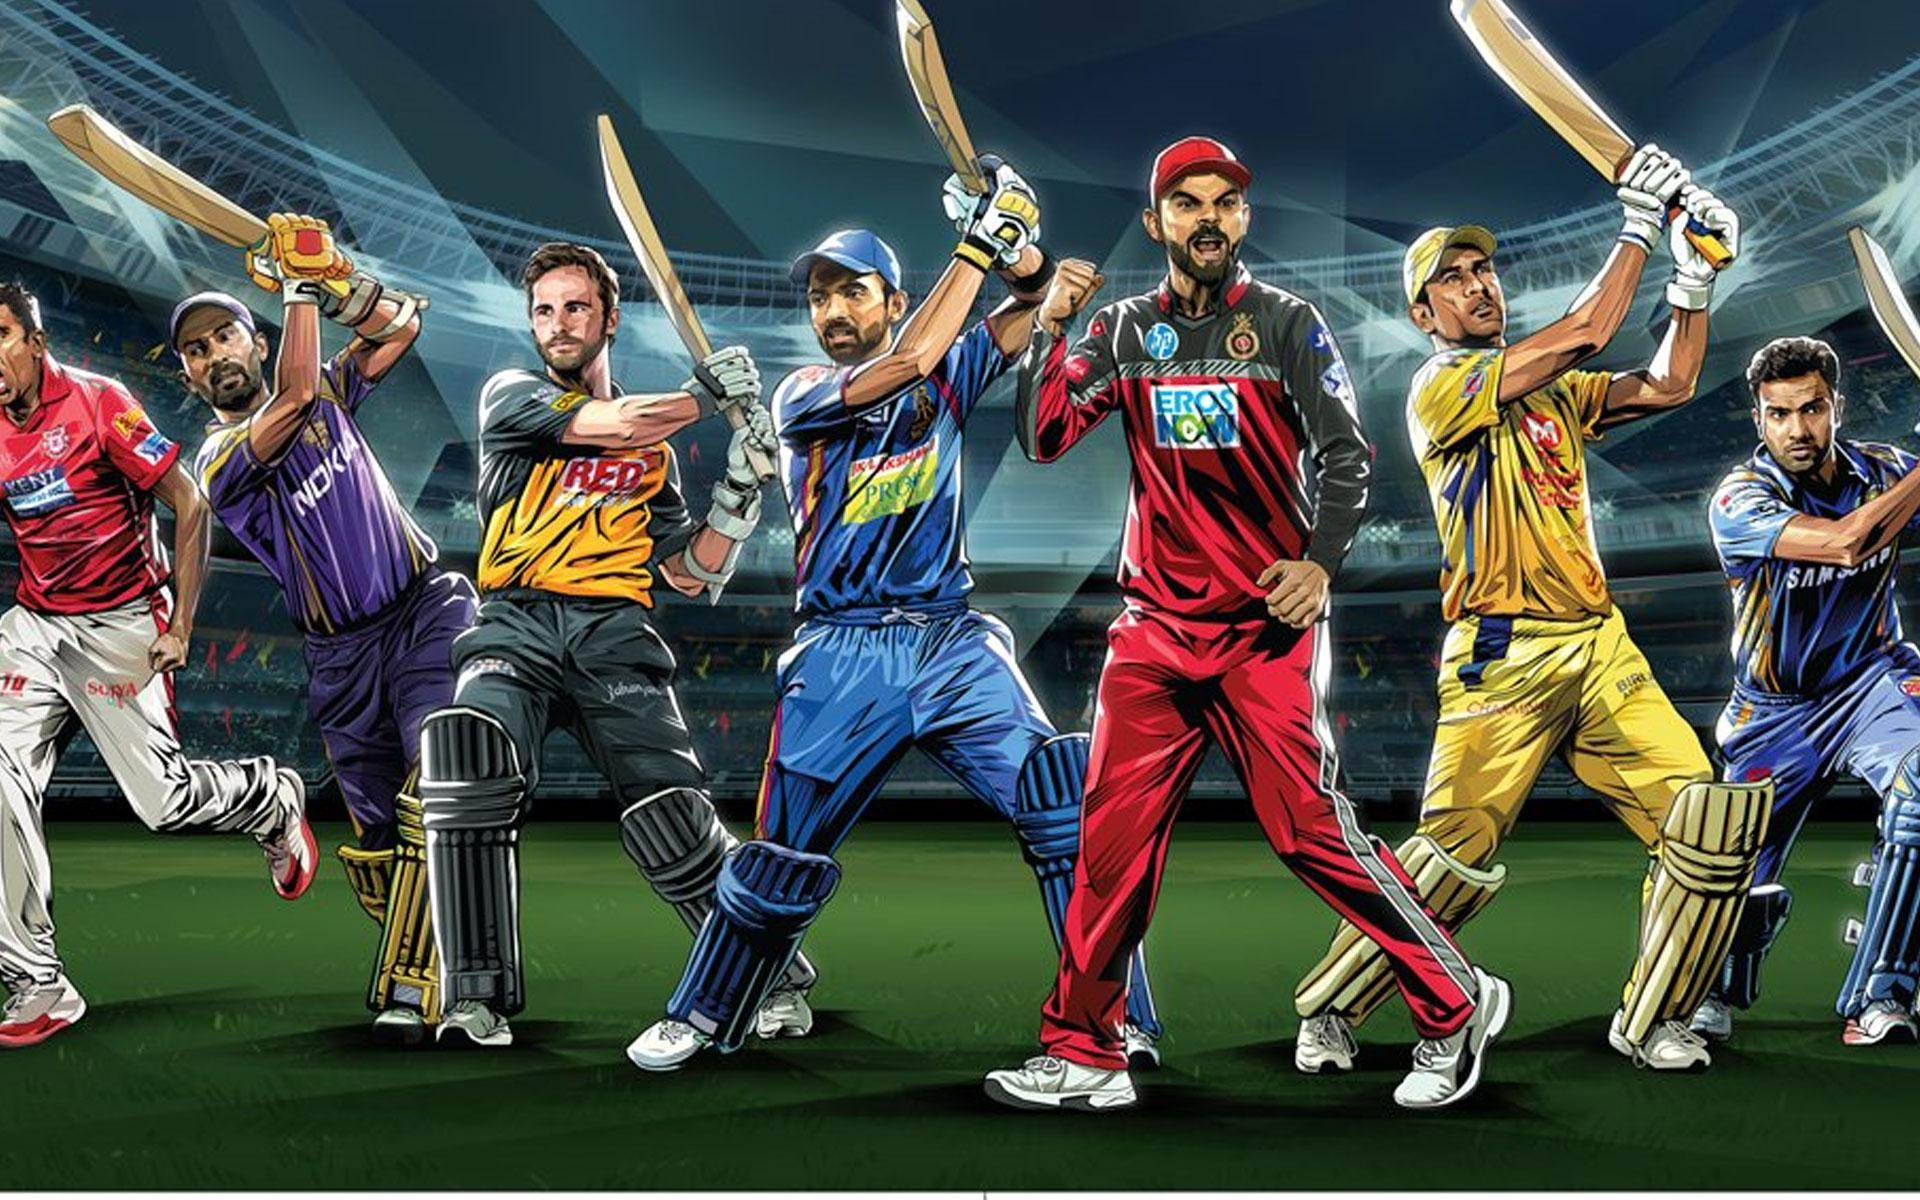

In [2]:
from IPython.display import Image #Library to import the image as a poster for the project
Image(filename="C:\Local Clone\ipl-demo\Poster.png", width=840, height=10)

# IPL Cricket Score Predictor using Machine Learning

In this project, we will see how Machine Learning can be used to predict the final score of an IPL game in which two teams are given. In cricket, for predicting the score of a team, we need the following: Team 1, Team 2, Overs bowled, Runs scored, Wickets. Using all these fields, we can store the result in a field "Total". In our given dataset, we will first import the CSV file, and then extract our relevant fields to work with, using a Simple Linear Regression model, we will use Total field to train the model and predict the score for a given innings.








#### Importing the Dataset into the Python file

In [108]:
#Importing the necessary libraries which will be used in 
import pandas as pd
import csv as csv
from datetime import datetime

ModuleNotFoundError: No module named 'sklearn'

In [77]:
#Import the data frame into using Pandas library and csv_reader
dataframe = pd.read_csv('iplmatchdata.csv')

dataframe.rename(columns={"mid": "matchid"}, inplace=True)
dataframe.rename(columns={"bat_team": "batting_team"}, inplace=True)
dataframe.rename(columns={"bowl_team": "bowling_team"}, inplace=True)

dataframe.head() #Display the content of the data to show a glimpse of the kind of columns that are present 

,matchid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In the given dataset, let's look at what each column means-
mid - matchid 

#### Exploring the Dataset and Cleaning it 

In [104]:
dataframe.info #This will give us information about our dataset and tell how many rows and columns are present

In [105]:
dataframe.isnull().sum() #This shows that all the columns are not null and have data values in them

For our Machine Learning Model, we need the following fields from our dataset to use in the model-
1. Batting Team and Bowling Team- These are the the teams that are playing a particular match and their past histories will be considered in predicting the score
2. Runs- This is the field which indicates what is the current score of the team at a given point in the match
3. Wickets- This is the field which indicates how many wickets have been lost by the batting team at a given point in the match
4. Total- In our dataset, this field will behave as variable x to train our model in the machine learning model

Now we will remove the columns that we do not intend to use in our Machine Learning Model. These fields would be venue, batsman, bowler, matchid, striker, and non striker: 

In [119]:
unwanted_columns = ['venue', 'batsman', 'bowler', 'venue','striker', 'non-striker']
dataframe.drop(labels= unwanted_columns, inplace= True, axis= 1 )
dataframe.head() #Displaying the dataset after removing the unwanted columns from the dataset

,matchid,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


Now that we have our basic dataset, we will now work on a Hypothesis. 
Basically, the matches that are being played in IPL are 20 overs match. An individual is able to get a good guess of the predicted score after the batting team has played for 10 overs. After 10 overs, we get a fair idea of what ideal score could look like. Therefore, we will now filter our dataframe with entries which have minimum 10 overs.

In [120]:
dataframe = dataframe[dataframe['overs'] >=10.0]
dataframe.head()

,matchid,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
62,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,88,1,10.1,27,1,222
63,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,92,1,10.2,31,0,222
64,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,92,1,10.3,31,0,222
65,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,98,1,10.4,37,0,222
66,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,98,1,10.5,37,0,222


In our dataframe, we can see that we have the first field as date. However, Python sees this field as an object-data type. Therefore we will have to convert the date field into a Date-Time object using the Python datetime library. 

Here we will make our dataframs's date column and pass that into variable x. The field expression in the apply() section reflects the date format that we need our original date column to split into.

In [121]:
from datetime import datetime
dataframe['date'] = pd.to_datetime(dataframe["date"])
dataframe['date'].dtype

dtype('<M8[ns]')

### Preparing the data for the Machine Learning Model

In our dataset, we have various fields such as string, date and time, integers, floats, etc. However, a machine learning model is incapable of inferring some of the fields such as String or date, therefore, we will have to convert all the data fields in our dataset into a numberic format. As discussed earlier, in our Machine Learning model, the batting_team and bowling_team are the two teams that will be used in the model for score prediction but these fields are not in a numeric format. Therefore, we will be using a technique called encoding categorical variables to convert these two fields into numeric format. 

In [122]:
hot_coded_data = pd.get_dummies(data = dataframe, columns= ['batting_team', 'bowling_team'])

In [150]:
hot_coded_data.shape

(37659, 36)

CREATING THE TRAINING DATA AS WELL AS TEST DATA FOR THE MACHINE LEARNING MODEL



Here, we will create a pair of training and test data for X, and a pair of training and test data for Y. 
In usual cases, a dataset is split into a percentage for training data like say 80%, and a portion is set for testing the model which is about 20%. 

In this case, we have a time series data from 2008 to 2017. So what we will do here is split our data on the basis of the year. Year 2008 to 2016 would go to training data for X and Y, and 2017 and beyond will be used for Test data for X and Y. This way, we will still be able to follow the 80-20% split for training and testing. 

In [125]:
hot_coded_data['date']= pd.to_datetime(hot_coded_data['date'])

In [126]:
dum_train = hot_coded_data['date'].apply(lambda x: x.year) <=2016
dum_test = hot_coded_data['date'].apply(lambda x: x.year) >= 2017

In [154]:
X_train = hot_coded_data.loc[dum_train, hot_coded_data.columns != 'total']
X_test = hot_coded_data.loc[dum_test, hot_coded_data.columns != 'total']

Y_train = hot_coded_data.loc[dum_train, 'total'].values
Y_test = hot_coded_data.loc[dum_test, 'total'].values

In [155]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(34102, 35) (34102,)
(3557, 35) (3557,)


Now that we have split our data into training and testing, we don't require the date column anymore. Since the data column takes up some data, we can clear it which will make our model run faster. 

In [156]:
X_train.drop(labels='date', axis= True, inplace= True)
X_test.drop(labels= 'date', axis= True, inplace= True)

In [157]:
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(34102, 34) (34102,)
(3557, 34) (3557,)


MODEL SELECTION AND TRAINING

Now comes one of the most critical stage in the project. We will now select a model for our project and this model will take the training data, and then give out the predicted score on the basis of the total field that it has been trained on. 
In this project since the labels are directly connected with the total field, there is a linear relation between the fields and total. 
Therefore, we will use a SIMPLE LINEAR REGRESSION MODEL here. 

In [159]:
from sklearn.linear_model import LinearRegression
reg_mod = LinearRegression()#init
reg_mod.fit(X_train, Y_train)


LinearRegression()

Now that we have fit our training data into the model, it is now the time to evaluate it and get some predictions in.

MODEL EVALUATION

In [160]:
score_prediction =  reg_mod.predict(X_test)

Now that the model predictions are successfully generated, we will plot the results of the prediction in the form of a graph to understand how the predictions look.

C:\Users\hthakur2\AppData\Local\Temp\ipykernel_19588\2448409307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-score_prediction)


<Axes: ylabel='Density'>

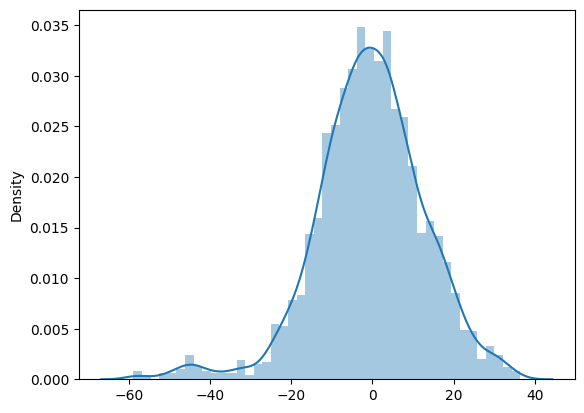

In [161]:
import seaborn as sns
sns.distplot(Y_test-score_prediction)